In [1]:

!python -m pip install --upgrade pip setuptools wheel


Defaulting to user installation because normal site-packages is not writeable
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 70.2.0
    Uninstalling setuptools-70.2.0:
      Successfully uninstalled setuptools-70.2.0


In [2]:
!python -m pip install ultralytics opencv-python kaggle



Defaulting to user installation because normal site-packages is not writeable


In [3]:
import ultralytics
print(ultralytics.__version__)


8.3.184


**IMPORTING LIBRARIES**

In [4]:
import os
import shutil
import yaml
from ultralytics import YOLO


In [5]:
original_path = r"C:\Users\fastf\Downloads\weapon dataset"

# Safe folder name without spaces/parentheses
safe_path = r"C:\Users\fastf\Downloads\weapon_dataset"

# Rename folder if needed
if original_path != safe_path:
    if not os.path.exists(safe_path):
        shutil.move(original_path, safe_path)
    else:
        print(f"Safe path already exists: {safe_path}")

Safe path already exists: C:\Users\fastf\Downloads\weapon_dataset


In [7]:
train_images = r"C:/Users/fastf/Downloads/weapon_dataset/weapon_detection/train/images"

weapon_names = set()
for file in os.listdir(train_images):
    if file.lower().endswith(('.jpg','.jpeg','.png')):
        weapon_names.add(file.split('_')[0])
weapon_names = sorted(weapon_names)
print("Unique weapons:", weapon_names)


Unique weapons: ['Automatic Rifle', 'Bazooka', 'Grenade Launcher', 'Handgun', 'Knife', 'SMG', 'Shotgun', 'Sniper', 'Sword']


In [8]:
dataset_yaml = {
    'train': os.path.join(safe_path, 'weapon_detection', 'train', 'images').replace('\\','/'),
    'val': os.path.join(safe_path, 'weapon_detection', 'val', 'images').replace('\\','/'),
    'nc': len(weapon_names),
    'names': {i: name for i, name in enumerate(weapon_names)}
}

yaml_path = os.path.join(safe_path, 'weapon_detection', 'dataset.yaml')
with open(yaml_path, 'w') as f:
    yaml.dump(dataset_yaml, f)

print(f"dataset.yaml created at: {yaml_path}")

dataset.yaml created at: C:\Users\fastf\Downloads\weapon_dataset\weapon_detection\dataset.yaml


In [9]:
from ultralytics import YOLO
import yaml

yaml_path = "C:/Users/fastf/Downloads/weapon_dataset/weapon_detection/dataset.yaml"

# Load YAML manually
with open(yaml_path, 'r') as f:
    data = yaml.safe_load(f)

print(data)


{'names': {0: 'Automatic Rifle', 1: 'Bazooka', 2: 'Grenade Launcher', 3: 'Handgun', 4: 'Knife', 5: 'SMG', 6: 'Shotgun', 7: 'Sniper', 8: 'Sword'}, 'nc': 9, 'train': 'C:/Users/fastf/Downloads/weapon_dataset/weapon_detection/train/images', 'val': 'C:/Users/fastf/Downloads/weapon_dataset/weapon_detection/val/images'}


In [10]:
import os


data = {
    'names': {0: 'Automatic Rifle', 1: 'Bazooka', 2: 'Grenade Launcher', 3: 'Handgun', 4: 'Knife', 5: 'SMG', 6: 'Shotgun', 7: 'Sniper', 8: 'Sword'},
    'nc': 9,
    'train': 'C:/Users/fastf/Downloads/weapon_dataset/weapon_detection/train/images',
    'val': 'C:/Users/fastf/Downloads/weapon_dataset/weapon_detection/val/images'
}

# Train images
train_images_path = data['train']
train_images = os.listdir(train_images_path)

# Train labels (replace 'images' with 'labels' in path)
train_labels_path = train_images_path.replace("images", "labels")
train_labels = os.listdir(train_labels_path)

# Validation images
val_images_path = data['val']
val_images = os.listdir(val_images_path)

# Validation labels
val_labels_path = val_images_path.replace("images", "labels")
val_labels = os.listdir(val_labels_path)

print(f"Number of train images: {len(train_images)}")
print(f"Number of train labels: {len(train_labels)}")
print(f"Number of val images: {len(val_images)}")
print(f"Number of val labels: {len(val_labels)}")


Number of train images: 571
Number of train labels: 571
Number of val images: 143
Number of val labels: 143


In [11]:
!pip install -U ultralytics

Defaulting to user installation because normal site-packages is not writeable


**MODEL TRAINING**

In [12]:

from ultralytics import YOLO


model = YOLO("yolov8n.yaml") 
model.train(
    data="C:/Users/fastf/Downloads/weapon_dataset/weapon_detection/dataset.yaml",
    epochs=20,
    imgsz=640,
    batch=16,
    project="C:/Users/fastf/Downloads/weapon_dataset/weapon_results",
    name="weapon_detection"
)

Ultralytics 8.3.184  Python-3.12.7 torch-2.8.0+cpu CPU (12th Gen Intel Core(TM) i5-1235U)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:/Users/fastf/Downloads/weapon_dataset/weapon_detection/dataset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=weapon_detection5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, pat

train: Scanning C:\Users\fastf\Downloads\weapon_dataset\weapon_detection\train\labels.cache... 571 images, 0 background

val: Fast image access  (ping: 0.10.0 ms, read: 408.5340.6 MB/s, size: 74.1 KB)



C:\Users\fastf\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning C:\Users\fastf\Downloads\weapon_dataset\weapon_detection\val\labels.cache... 143 images, 0 backgrounds, 0
C:\Users\fastf\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Plotting labels to C:\Users\fastf\Downloads\weapon_dataset\weapon_results\weapon_detection5\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to C:\Users\fastf\Downloads\weapon_dataset\weapon_results\weapon_detection5
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      3.449      4.594      4.233         36        640: 100%|██████████| 36/36 [04:38<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:23<0

                   all        143        219   0.000894      0.196    0.00426    0.00114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      3.428      4.226      4.082         34        640: 100%|██████████| 36/36 [05:31<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:22<0

                   all        143        219    0.00118      0.196    0.00391    0.00103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      3.195      3.897      3.856         39        640: 100%|██████████| 36/36 [04:33<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:21<0

                   all        143        219   0.000314      0.246   0.000533   0.000159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      3.156      3.699      3.669         37        640: 100%|██████████| 36/36 [04:37<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:22<0

                   all        143        219    0.00299      0.395     0.0064    0.00141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G       2.97      3.558      3.474         36        640: 100%|██████████| 36/36 [04:42<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:24<0

                   all        143        219      0.708      0.108     0.0326    0.00767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      2.902      3.457      3.355         47        640: 100%|██████████| 36/36 [04:36<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:24<0

                   all        143        219      0.858     0.0329     0.0144    0.00301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      2.872      3.344      3.279         40        640: 100%|██████████| 36/36 [04:36<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:23<0

                   all        143        219      0.859     0.0309     0.0274    0.00511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      2.772      3.325        3.2         39        640: 100%|██████████| 36/36 [04:39<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:22<0

                   all        143        219      0.859     0.0453     0.0308    0.00929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      2.672      3.207      3.101         65        640: 100%|██████████| 36/36 [04:35<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:22<0

                   all        143        219      0.672     0.0103    0.00417    0.00119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      2.584      3.119      3.015         39        640: 100%|██████████| 36/36 [04:26<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:21<0

                   all        143        219      0.703     0.0432     0.0334    0.00935


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


C:\Users\fastf\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
      11/20         0G      2.472      3.529      2.898         14        640: 100%|██████████| 36/36 [04:25<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:21<0

                   all        143        219      0.688      0.071     0.0715     0.0203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G      2.319      3.304       2.83         11        640: 100%|██████████| 36/36 [04:32<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:22<0

                   all        143        219      0.398     0.0879     0.0514     0.0166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G      2.216      3.157      2.709         11        640: 100%|██████████| 36/36 [04:27<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:21<0

                   all        143        219       0.71      0.073     0.0711      0.029



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G      2.148      3.005      2.634         23        640: 100%|██████████| 36/36 [04:32<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:20<0

                   all        143        219      0.219     0.0995     0.0733     0.0304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G      2.087      2.942      2.578         19        640: 100%|██████████| 36/36 [04:27<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:21<0

                   all        143        219      0.466      0.118       0.12     0.0596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G      2.075      2.865      2.545         17        640: 100%|██████████| 36/36 [04:38<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:22<0

                   all        143        219      0.425      0.109     0.0974     0.0439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G       2.01      2.781      2.533         29        640: 100%|██████████| 36/36 [04:48<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:22<0

                   all        143        219      0.426      0.141      0.116     0.0585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G      1.987      2.706      2.484         13        640: 100%|██████████| 36/36 [04:48<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:22<0

                   all        143        219      0.652       0.11      0.137     0.0614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G      1.975      2.647      2.459         18        640: 100%|██████████| 36/36 [04:49<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:23<0

                   all        143        219      0.449      0.135       0.15     0.0749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G      1.926      2.583      2.429         17        640: 100%|██████████| 36/36 [04:49<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:23<0

                   all        143        219      0.501      0.157      0.151     0.0768



20 epochs completed in 1.684 hours.
Optimizer stripped from C:\Users\fastf\Downloads\weapon_dataset\weapon_results\weapon_detection5\weights\last.pt, 6.2MB
Optimizer stripped from C:\Users\fastf\Downloads\weapon_dataset\weapon_results\weapon_detection5\weights\best.pt, 6.2MB

Validating C:\Users\fastf\Downloads\weapon_dataset\weapon_results\weapon_detection5\weights\best.pt...
Ultralytics 8.3.184  Python-3.12.7 torch-2.8.0+cpu CPU (12th Gen Intel Core(TM) i5-1235U)
YOLOv8n summary (fused): 72 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:20<0


                   all        143        219      0.501      0.157      0.151     0.0766
       Automatic Rifle        106        162      0.313      0.574      0.423       0.21
               Bazooka          4          6          1          0          0          0
      Grenade Launcher         19         24      0.482     0.0833      0.228      0.121
               Handgun          2          2          0          0          0          0
                 Knife          3          4          1          0          0          0
                   SMG         17         21      0.213      0.286      0.254      0.129
Speed: 1.3ms preprocess, 94.5ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to C:\Users\fastf\Downloads\weapon_dataset\weapon_results\weapon_detection5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000018B020FF590>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
 

**MODEL EVALUATION**

In [13]:
from ultralytics import YOLO

model = YOLO("C:/Users/fastf/Downloads/weapon_dataset/weapon_results/weapon_detection4/weights/best.pt")
metrics = model.val()
print(metrics)


Ultralytics 8.3.184  Python-3.12.7 torch-2.8.0+cpu CPU (12th Gen Intel Core(TM) i5-1235U)
YOLOv8n summary (fused): 72 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 399.1295.8 MB/s, size: 198.1 KB)


val: Scanning C:\Users\fastf\Downloads\weapon_dataset\weapon_detection\val\labels.cache... 143 images, 0 backgrounds, 0
C:\Users\fastf\AppData\Roaming\Python\Python312\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:21<0


                   all        143        219      0.621      0.121      0.195     0.0883
       Automatic Rifle        106        162      0.488      0.488      0.427      0.227
               Bazooka          4          6          1          0      0.251      0.105
      Grenade Launcher         19         24          1          0      0.162     0.0595
               Handgun          2          2          0          0          0          0
                 Knife          3          4          1          0      0.158     0.0631
                   SMG         17         21      0.236      0.238      0.174     0.0752
Speed: 1.8ms preprocess, 102.5ms inference, 0.0ms loss, 4.8ms postprocess per image
Results saved to runs\detect\val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000018B01B75250>
curves: ['Precision-

In [17]:
model.predict(source=r"C:\Users\fastf\Downloads\weapon_dataset\test\test\weaponsgta5.gif", save=True, conf=0.25)



WARNING 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/2) C:\Users\fastf\Downloads\weapon_dataset\test\test\weaponsgta5.gif: 640x640 8 Automatic Rifles, 330.8ms
video 1/1 (frame 2/2) C:\Users\fastf\Downloads\weapon_dataset\test\test\weaponsgta5.gif: 640x640 7 Automatic Rifles, 353.0ms
Speed: 11.6ms preprocess, 341.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Automatic Rifle', 1: 'Bazooka', 2: 'Grenade Launcher', 3: 'Handgun', 4: 'Knife', 5: 'SMG', 6: 'Shotgun', 7: 'Sniper', 8: 'Sword'}
 obb: None
 orig_img: array([[[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],
 
        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],
 
        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],
 
        ...,
 
        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [5, 9, 6],
         [1, 1, 1]],
 
        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]]

**YOLO TRAINING RESULT VISUALIZATION**

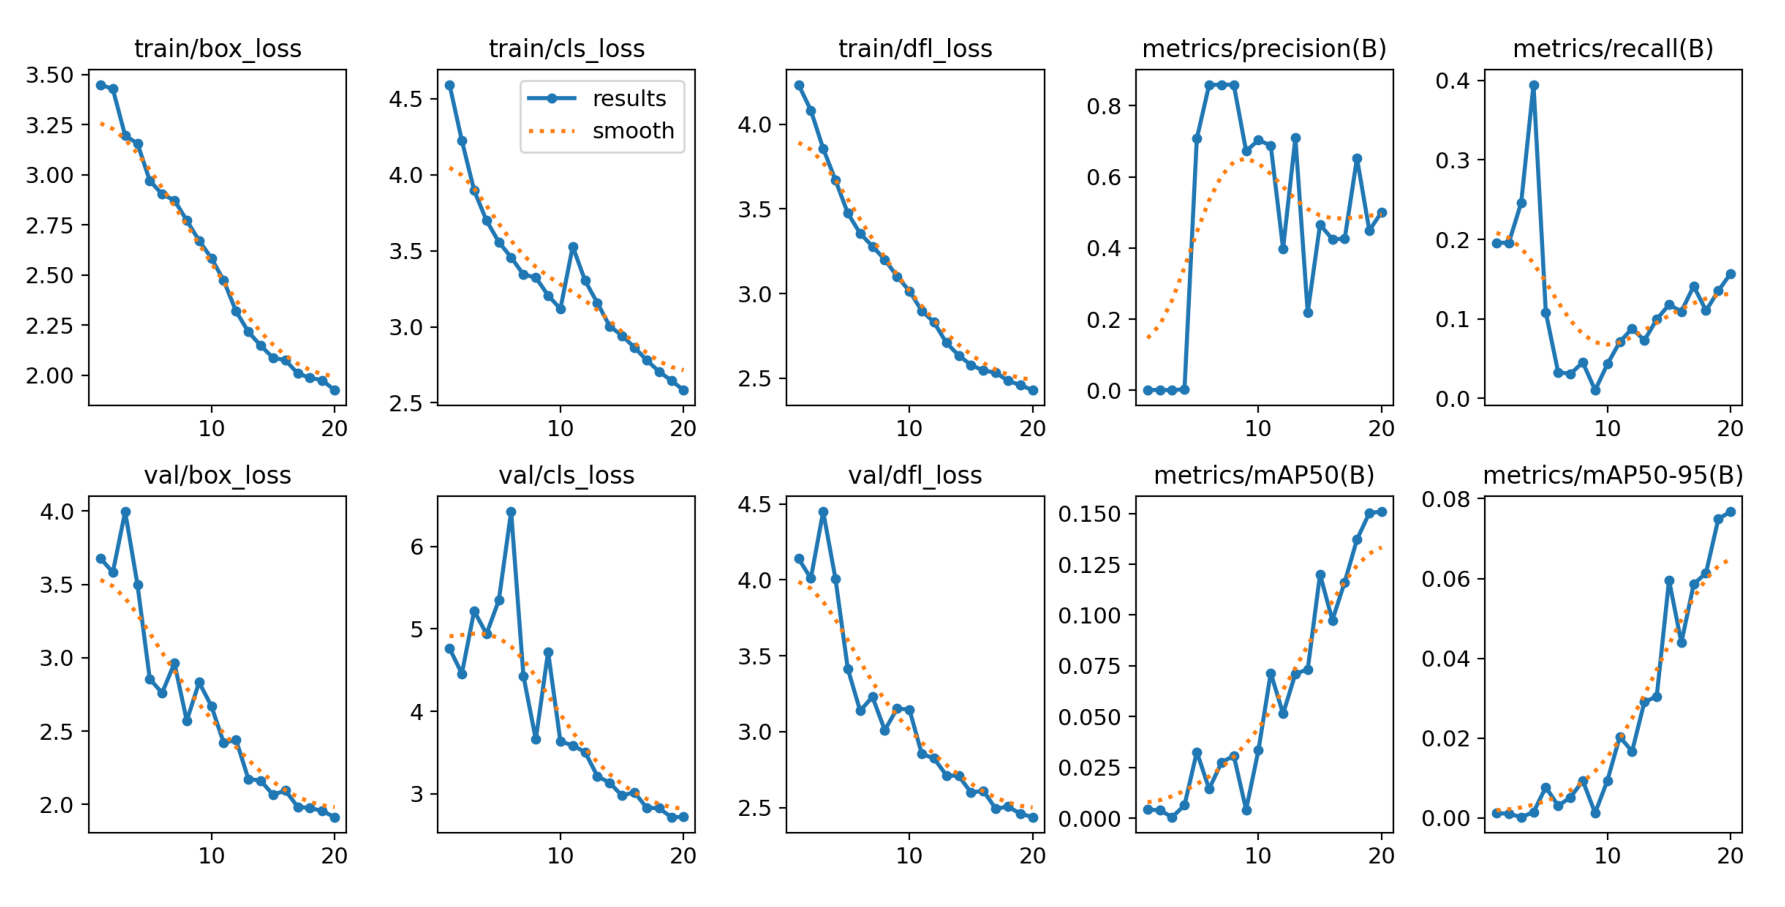

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(r"C:\Users\fastf\Downloads\weapon_dataset\weapon_results\weapon_detection5\results.png")
plt.figure(figsize=(12, 8), dpi=150)  
plt.imshow(img)
plt.axis("off")
plt.tight_layout()
plt.show()


**CONFUSION MATRIX**

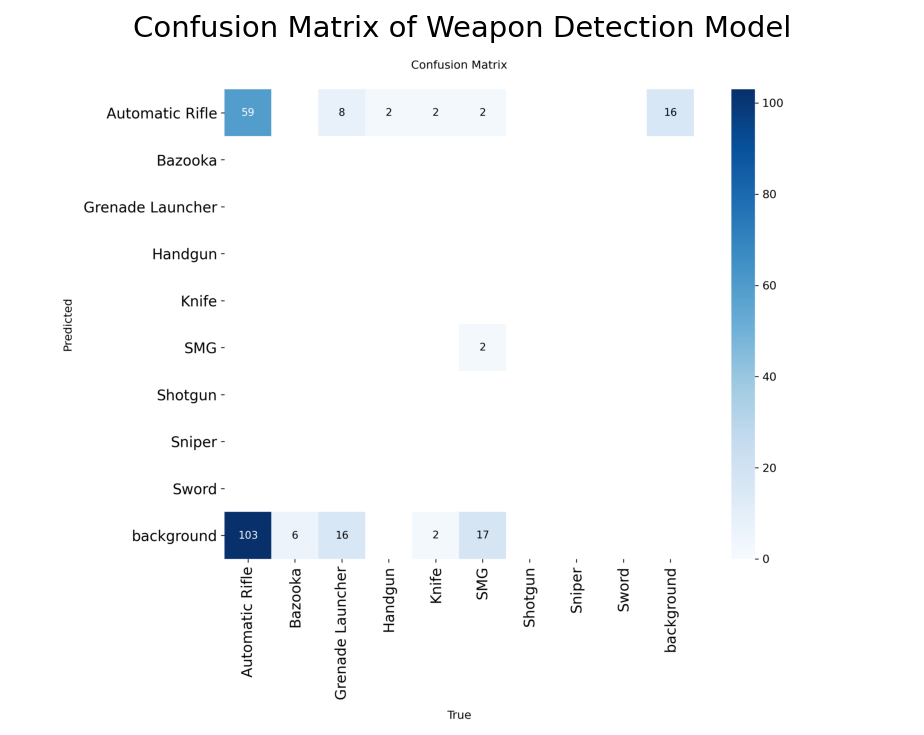

In [10]:
img = Image.open(r"C:\Users\fastf\Downloads\weapon_dataset\weapon_results\weapon_detection5\confusion_matrix.png") 
plt.figure(figsize=(7, 5), dpi=150)
plt.imshow(img)
plt.axis("off")
plt.title("Confusion Matrix of Weapon Detection Model", fontsize=14)
plt.tight_layout()
plt.show()
